In [ ]:
!git clone https://github.com/anupambcharya/machinelearning.git

In [ ]:
!pip install mahotas

In [7]:
from types import ModuleType

import pickle as cPickle
from sklearn.svm import LinearSVC
import argparse
import mahotas
import glob
import cv2
import numpy as np
import glob
from sklearn.linear_model import LogisticRegression
from google.colab.patches import cv2_imshow


model = cPickle.loads(open("classifier.cPickle", "rb").read())


In [8]:
def getImgFeature(image):
	# extract the mean and standard deviation from each channel of the image
	# in the HSV color space
	image = cv2.resize(image,(500,500))
	(means, stds) = cv2.meanStdDev(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
	colorStats = np.concatenate([means, stds]).flatten()

	# extract Haralick texture features
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	haralick = mahotas.features.haralick(gray).mean(axis=0)

	# return a concatenated feature vector of color statistics and Haralick
	# texture features
	return np.hstack([colorStats, haralick])

STOP_SIGNAL


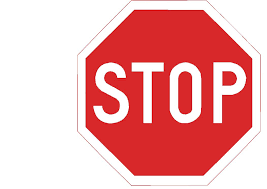

no_parking


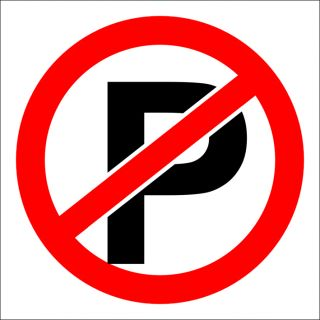

SLOW


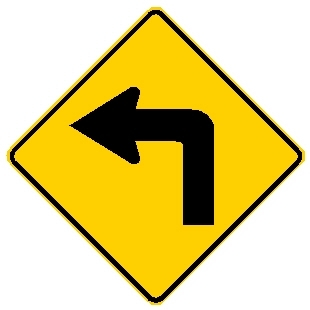

In [12]:
for imagePath in glob.glob("/content/machinelearning/MutliTexture/TrafficSignBoards/Testing/*.*"):

    image = cv2.imread(imagePath)
    features = getImgFeature(image)

     # classify the test image
    pred = model.predict(features.reshape(1, -1))[0]
    print(pred)

    #cv2.putText(image, pred, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0,
    #(0, 255, 0), 3)

    # show the output image
    cv2_imshow(image)